# 모델 성능 평가지표 (Metirc)
- 실제값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정 하는 것
- 모델 평가 목적
    - Over Fitting 을 방지하고 최적의 모델을 찾기 위해    

- 분류 문제 성능측정
    - 실제값과 예측값이 일치하는 갯수를 통해 측정

# 분류문제 성능 측정

![](https://codetorial.net/tensorflow/_images/MNIST_sample.png)

## 손글씨 분류 문제
- 0~9 손글씨 이미지 받아오기

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

- 8 x 8 크기의 이미지가 Flatten 되어있다.


In [2]:
digits.data.shape
# 8*8 인 이미지 이고, 8*8 을 학습시키기 위해 flatten 해 놓은 데이터 이다. 

(1797, 64)

In [3]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

```
[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,
  0.,  0., 13., 15., 10., 15.,  5.,  0.,  
  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  
  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  
  0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.,  
  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  
  0.,  2., 14.,  5., 10., 12.,  0.,  0.,  
  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]
```

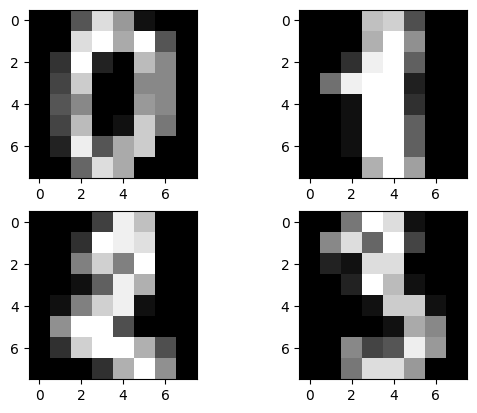

In [45]:
fig,ax = plt.subplots(2,2)
ax[0,0].imshow(digits.data[0].reshape(8,8),cmap="gray")
ax[0,1].imshow(digits.data[1].reshape(8,8),cmap="gray")
ax[1,0].imshow(digits.data[2].reshape(8,8),cmap="gray")
ax[1,1].imshow(digits.data[3].reshape(8,8),cmap="gray")
plt.show()

In [4]:
digits.target[0]

0

In [5]:
digits.target[1]

1

In [6]:
digits.target[2]

2

In [7]:
digits.target[3]

3

In [12]:
digits. #정답을 저장

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
import collections
collections.Counter(digits.target)
# 보통 180 개의 데이터 셋을 갖고 있다. 

Counter({3: 183,
         1: 182,
         5: 182,
         4: 181,
         6: 181,
         9: 180,
         7: 179,
         0: 178,
         2: 177,
         8: 174})

### 5을 맞추는 문제로 재정의

In [15]:
data = digits.data
target = (digits.target == 5).astype(int)

In [19]:
collections.Counter(target # data 가 5 이면 target 5 -> 1 변경, data 5가 아니면 target 0 으로 변경 
# 숫자 5는 182개  나머지 1615개 

Counter({0: 1615, 1: 182})

### 학습셋과 검증셋 분리

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data, target)
x_train.shape,x_test.shape,y_train.shape,y_test.shape 

((1347, 64), (450, 64), (1347,), (450,))

In [23]:
collections.Counter(y_train # 10% 로 정답 비중을 갖고 있다. 

Counter({0: 1207, 1: 140})

In [25]:
collections.Counter(y_test) # 10% 로 정답 비중을 갖고 있다.

Counter({0: 408, 1: 42})

# 혼동행렬(Confusin Matrix)
- 이진 분류의 model 성능측정 지표
    - 이진 분류에서 예측 오류가 어느정도 되는지와 어떠한 유형의 예측 오류가 발생하는지를 나타내는 지표

- Precision (정밀도)
    - 양성으로 예측한 값들 중에 맞춘 비율

- Recall(재현율)
    - Sensitivity(민감도)
    - TPR
    - 실제 양성값들 중에 맞춘 비율

- FPR
    - 실제 음성값들 중에 못 맞춘 비율

## Evaluating model performance : F-score, Accuracy

1. True Positive(TP) : 결함이 있다고 예측한 것들 중 실제로 결함이 있는 것
2. False Positive(FP) : 결함이 있다고 예측한 것들 중 실제로 결함이 없는 것
3. True Negative(TN) : 결함이 없다고 예측한 것들 중 실제로 결함이 없는 것
4. False Negative(FN) : 결함이 없다고 예측한 것들 중 실제로 결함이 있는 것

|                     | 실제 True          | 실제 False          |
|---                  |---                 |---                  |
| 분류결과 True       | $$N_{TP}$$         |    $$N_{FP}$$       |
| 분류결과 False      |   $$N_{FN}$$       |   $$N_{TN}$$        | 

- $N$ : 개수를 나타낸다. 

### accuracy, precision, recall 
$$\text{accuracy} = \frac{\text{정확하게 예측한 개수}}{\text{예측한 전체 개수}} \frac{N_{TP} + N_{TN}}{N_{TP}+N_{FN}+N_{FP}+N_{TN}}$$
$$\text{precision} = \frac{\text{True 라고 정확하게 예측한 개수}}{\text{True 라고 예측한 총 개수}} = \frac{N_{TP}}{N_{TP}+N_{FP}}$$
$$\text{recall} = \frac{\text{True 라고 정확하게 예측한 개수}}{\text{실제로 True의 개수}} =\frac{N_{TP}}{N_{TP}+N_{FN}}$$

### F-score
- precision과 recall을 이용해 계산 가능

$$\text{F-score} = \frac{(1+\beta^2) \text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}$$

- $\beta$는 precision과 recall중 어떤 것에 가중을 부여하여 판단할지 사용자가 정하는 상수 

## 임계값(thresholds)
- 모델은 분류에서 확률(0~1) 또는 음수에서 양수사이에 실수를 예측값으로 출력
- 사이킷런에서는 `predict_probar`, `decision_function`메소드를 제공
- predict_probar : 0.5 이상이면 1로 예측
- decision_function : 0 이상이면 1로 예측

## Accuracy 의 한계
- 오류(틀린갯수)중에서 FN 오류를 줄이는 것이 더 중요한 경우
- 오류 중에 FP 오류를 줄이는 것이 더 중요한 경우
- 정확도는 위에 두가지 오류에 정도의 차이를 구분할수 없기 때문에 적절한 성능지표가 될수 없다.
- 음성(0)이 양성(1)보다 훨씬 많은 경우 음성(0)으로만 예측해도 높은 정확도를 보이기 때문에 적절한 성능지표가 될수없다.


In [26]:
import numpy as np
SEED =1234

- Decision Tree

In [27]:
# Decision tree model 을 이용해 학습시켜 보자
from sklearn.tree import DecisionTreeClassifier

In [28]:
tree = DecisionTreeClassifier(max_depth=3, random_state=SEED)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [30]:
pred_tree = tree.predict(x_test)

- 정확도 평가

In [31]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, pred_tree) # 96%의 정확도를 나타 내고 있따. 

0.9688888888888889

- Confusion Matrix 그리기

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix?

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

In [39]:
import matplotlib.pyplot as plt

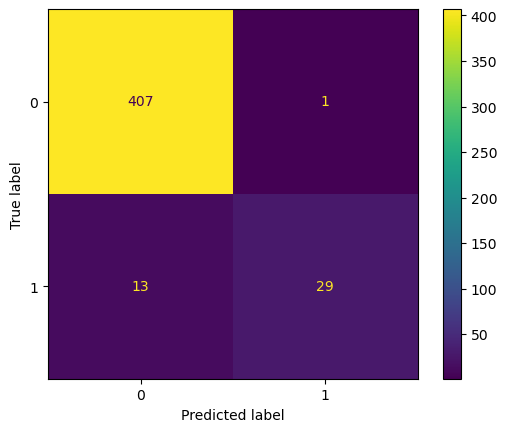

In [41]:
cm = confusion_matrix(y_test,pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [42]:
# Logistic regression model 로 돌려보세요
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=SEED)
logistic.fit(x_train, y_train)
pred_logistic = logistic.predict(x_test)

score = accuracy_score(y_test, pred_logistic)
print(score)

0.9888888888888889


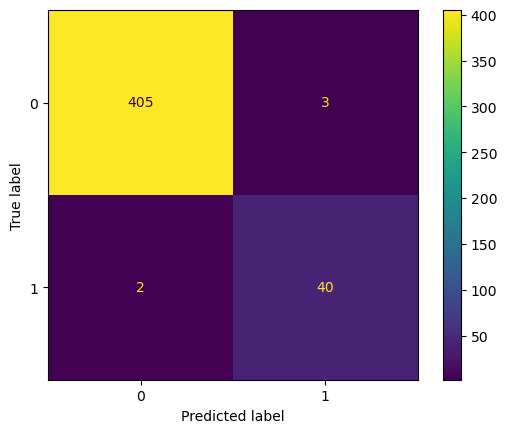

In [44]:
cm = confusion_matrix(y_test, pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Precision vs Recall
- FP 줄이는것이 목표일때 Precision 사용
- FN 줄이는것이 목표일때 Recall 사용

In [45]:
from sklearn.metrics import precision_score , recall_score

precision_score(y_test,pred_tree)

0.9666666666666667

In [47]:
# precision_score?

In [48]:
recall_score(y_test,pred_tree)

0.6904761904761905

### Precision-Recall Trade-off (절충관계)

![trade_off.png](https://i0.wp.com/thecleverprogrammer.com/wp-content/uploads/2020/07/un-87.png)

In [56]:
predict_proba = tree.predict_proba(x_test)[:, 1] # 숫자 5일 확률들만 출력해 보자
print(predict_proba)

[0.01059322 0.01059322 0.01059322 0.00900901 0.01059322 0.01059322
 0.01059322 0.01059322 0.01059322 0.00900901 0.00900901 0.01059322
 0.01059322 0.01059322 0.01059322 0.38596491 0.01059322 0.01059322
 0.01059322 0.01059322 0.00900901 0.01059322 0.00900901 0.01059322
 0.01059322 0.01059322 0.38596491 0.01059322 0.01059322 0.01059322
 0.01059322 0.01059322 0.01059322 0.01059322 0.01059322 0.97169811
 0.01059322 0.01059322 0.01059322 0.01059322 0.01059322 0.01059322
 0.01059322 0.01059322 0.00900901 0.01059322 0.97169811 0.01059322
 0.38596491 0.01059322 0.00900901 0.01059322 0.01059322 0.97169811
 0.01059322 1.         0.97169811 0.         0.01059322 0.01059322
 0.00900901 0.01059322 0.01059322 0.00900901 0.00900901 0.01059322
 0.01059322 0.01059322 0.01059322 0.01059322 0.00900901 0.00900901
 0.01059322 0.00900901 0.01059322 0.01059322 0.00900901 0.00900901
 0.01059322 0.01059322 0.00900901 0.01059322 0.01059322 0.01059322
 0.00900901 0.38596491 0.00900901 0.01059322 0.01059322 0.3859

In [55]:
sum(tree.predict_proba(x_test)[:, 1] > 0.5) # 0.5 를 기준으로 숫자 5인지 아닌지를 분류 한다. 

30

In [63]:
threshold = 0.3 # 0.3 으로 기준을 낮추자 
pred = np.where(predict_proba > threshold, 1, 0) # threshold 값 이상이면1 아니면 0 

In [64]:
precision_score(y_test, pred), recall_score(y_test, pred)

(0.6875, 0.7857142857142857)

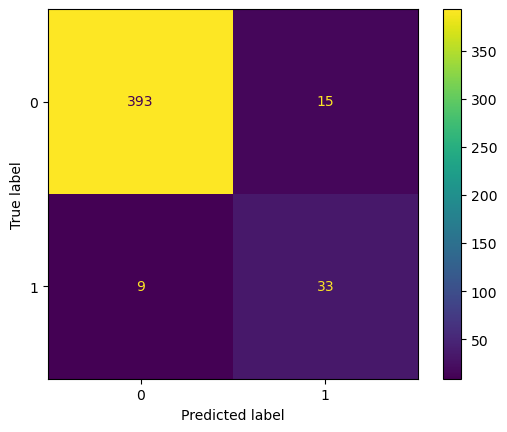

In [65]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
# 숫자 5가 아닌데 5라고 예측한 숫자들이 늘어 났다. 좀더 여유롭게 예측함 

## F1-score
$$
F1 = 2*\frac{Precision*Recall}{Precision+Recall}
$$
- Precision 과 Recall의 조화평균
- 정밀도와 재현율 사이에 하나가 높아지면 다른 하나가 낮아지는 상황이 자주 발생하기에 이를 보정하기 위해 개발
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않았을때 높은 점수가 나온다.
- Precison 과 Recall은 Trade-off 관계이기때문에, 이둘의 조화평균값이 F1-score를 많이 사용한다.

- precision = 0.1, recall = 0.9 가정!!

In [66]:
(0.1 + 0.9)/2 # 산술평균

0.5

In [69]:
2*(0.1 * 0.9) / (0.1 + 0.9) # 조화평균

0.18000000000000002

In [70]:
2*(0.5 * 0.5) / (0.5 + 0.5)

0.5

In [72]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.7333333333333333

In [73]:
# precision, recall, f1-score 를 한번에
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       408
           1       0.69      0.79      0.73        42

    accuracy                           0.95       450
   macro avg       0.83      0.87      0.85       450
weighted avg       0.95      0.95      0.95       450



## ROC (Receiver Operating Characteristic curve)
- FPR을 X축으로, TPR을 Y축으로 해서 둘간의 관계를 표현한 그래프
    - FPR = FP / (FP+TN)
    - TPR = TP / (FN+TP)
- FPR이 천천히 증가하면서  TPR이 빨리 증가하는 모델을 만들어야한다.
- 면적이 클수록 좋은 모델임

# 참고
- ROC vs AP
- ROC : 이진 분류기에서 사용되는 평가지표
    - TPR, FPR
    - AUC 값으로 ROC 커브의 결과를 나타낸다.
- mAP : 다중클래스 분류기 or 컴퓨터 비전에서 사용되는 객체탐지기에 사용된다.
    - Precision, recall
    -  각클래스의 AP의 평균값으로 mAP 값을 산출 한다. 

![ROC.png](https://miro.medium.com/max/640/1*pk05QGzoWhCgRiiFbz-oKQ.webp)

- ROC Curve

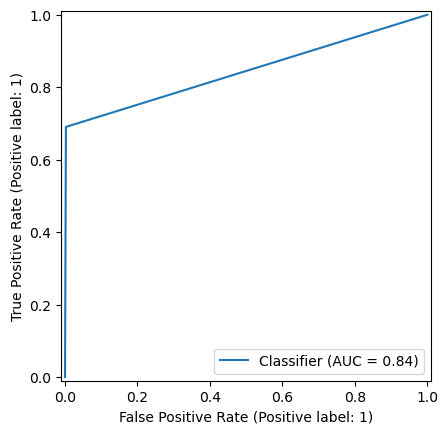

In [74]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, pred_tree)
plt.show()

## AUROC (ROC AUC) 
- Roc Curved의 밑부분 면적 
- 넓을수록 모형 성능이 좋다 (1에 가까울수록 좋다)
- 임계값이 어떻게 선택되었는지와 무관하게 모델의 예측 품질을 측정 할수 있다
- Poor model(0.5 ~ 0.7)
- Fare model(0.7 ~ 0.8)
- Good model(0.8 ~ 0.9)
- Excellent model (0.9~1.0)

# 다중분류 Metric

## F1-score (다중분류)
- micro
    - 전체 클래스의 대하여 TP/FP/FN 구한뒤에 F1-score 계산
- macro
    - 각 클래스 대하여 F1-score 구한뒤 산술 평균
- weighted
    - 각 클래스의 대하여 F1-score 구한뒤 각 클래스가 차지하는 비율에 따라 가중평균
    


In [75]:
f1_score(y_test, pred, average="micro")

0.9466666666666667

In [76]:
f1_score(y_test, pred, average="macro")

0.8518518518518519

In [77]:
f1_score(y_test, pred, average="weighted")

0.9482469135802469

# Metric 아님!
- 소프트맥스 함수(Softmax Function)
$$
softmax(z) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$
    - 각클래스에 대한 확률을 출력
    - 입력받은 값들을 0~1사이의 값들로 모두 정규화하면 출력값들의 합은 항상 1이 되는 특성을 가진 함수

In [ ]:
# LOGIT -> 확률(X) SCORE(0~1 사이의 점수) -> SOFTMAX FUNCTION -> 확률


- 음의 로그함수
    - 1을 넣으면 0이 나온다. 0에 가까운 값을 넣을수록 큰값이 나온다.

## Multi classification 에서의 Cross_entropy(logloss)
- 모델이 예측한 확률 값을 반영해서 평가
- 0에 가까울수록 좋은 모델
- 정답에 해당하는 확률값들을 음의 로그함수에 넣어서 나온값들의 평균으로 평가 한다. 


<img src = "https://velog.velcdn.com/images%2Fskyepodium%2Fpost%2F70022c68-6383-4fb4-b588-60d220917606%2F%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-23%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%206.51.00.png" width = "1000"></br>
<img src = "https://velog.velcdn.com/images%2Fskyepodium%2Fpost%2F7c785085-fb24-4c7e-93a4-6b8ec79c4c4a%2F%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-23%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%206.18.41.png" width = "1000">

- https://velog.io/@skyepodium/logloss-%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0